<a href="https://colab.research.google.com/github/tanya-2004/TED_Talks_Web_Scraped_Dataset/blob/main/23456_TanyaAgrawal_MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MINOR PROJECT**

---






# **TASK 1** - Exploratory Data Analysis

##<-----------------------**Are there any missing values in the TED Talks dataset?**
----------------------------->

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/talks_info.csv')

In [ ]:
data.isnull().sum()

_id                     0
duration                0
event                   1
likes                   0
page_url                0
published_date          0
recorded_date           2
related_videos          0
speakers                0
subtitle_languages      0
summary                 0
title                   0
topics                  0
transcript            648
views                   0
youtube_video_code    169
dtype: int64

Yes there are missing values present in the given dataset.

As shown above the missing values in the respective columns are

**event** - 1

**recorded_date** - 2

**transcript** - 648

**youtube_video_code** - 169

##Replacing missing values

In [ ]:
data = data.fillna(value = 'Other')

In [ ]:
data.isnull().sum()

_id                   0
duration              0
event                 0
likes                 0
page_url              0
published_date        0
recorded_date         0
related_videos        0
speakers              0
subtitle_languages    0
summary               0
title                 0
topics                0
transcript            0
views                 0
youtube_video_code    0
dtype: int64

Now, all the NaN values are replaced with the value = 'Other'

##<-----------------------**Visualize amount of talks that have <= views than mean.(Hint: Using histogram)**
----------------------------->

In [ ]:
data['views'].mean()

2130394.213993962

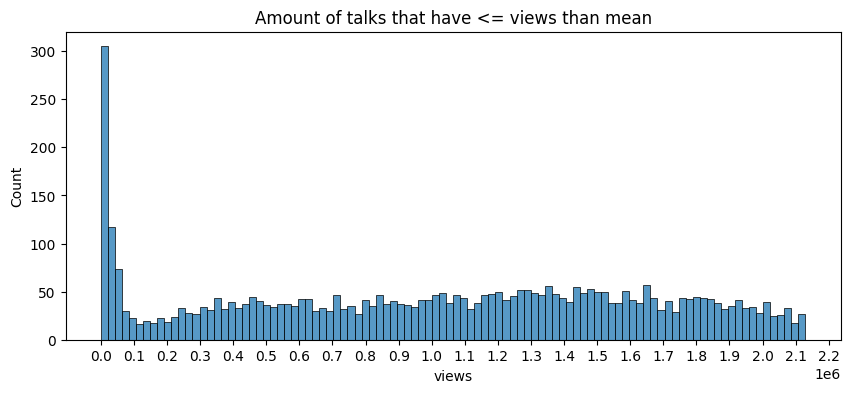

In [ ]:

plt.figure(figsize=(10,4))
plt.title("Amount of talks that have <= views than mean")
plt.xticks(np.arange(min(data['views']), max(data['views']), 100000))
hist = sns.histplot(x=data['views'].loc[data['views'] <= data['views'].mean()], bins=100)
plt.show()

The distribution of the talks with respect to the views<=mean shows that the maximum amount of talks has views ranging from (0 to 0.5)*10^6

##<-----------------------**Print the list of events with year in the end.**
----------------------------->

In [ ]:
event_list = data['event'].loc[data['event'].str.contains(r"\d{4}$", na=False, regex=True)].unique()
for event in event_list:
    print(event)

TED2006
TEDGlobal 2005
TED2004
TED2005
TEDSalon 2006
TED2007
TED2003
TED2002
TEDGlobal 2007
TED2001
Skoll World Forum 2007
TED2008
TED1984
DLD 2007
TED1990
EG 2007
TED1998
LIFT 2007
TEDSalon 2008
Serious Play 2008
Taste3 2008
TED2009
EG 2008
TEDGlobal 2009
TEDIndia 2009
TEDSalon London 2009
TEDMED 2009
TEDxBoston 2009
TED2010
Web 2.0 Expo 2008
DICE Summit 2010
TEDSalon London 2010
TEDGlobal 2010
TEDxBoston 2010
TED Senior Fellows at TEDGlobal 2010
TEDxTelAviv 2010
TEDxDU 2010
TEDxRotterdam 2010
TEDWomen 2010
TEDSalon NY2011
TEDxToronto 2010
TEDMED 2010
TEDxGöteborg 2010
TEDxToronto 2011
TED2011
TEDActive 2011
TEDSalon London Spring 2011
TEDGlobal 2011
TEDxBoston 2011
TEDxParis 2010
TEDxBoulder 2011
TEDMED 2011
TEDxDU 2011
TEDxWomen 2011
TEDxZurich 2011
TEDSalon NY2012
TED1994
TEDSalon London Fall 2011
TED2012
TEDYouth 2011
TEDMED 2012
TEDSalon London Spring 2012
TEDGlobal 2012
TEDxBoston 2012
TEDSalon London Fall 2012
TEDxJaffa 2012
TEDxZurich 2012
TEDxWomen 2012
TEDSalon NY2013
TED201

The above list contains Ted Talks' events containing the repective year at the end

##<-----------------------**Plot a histogram 'Published Date vs talks published that month**----------------------------->

Text(0, 0.5, 'talks published that month')

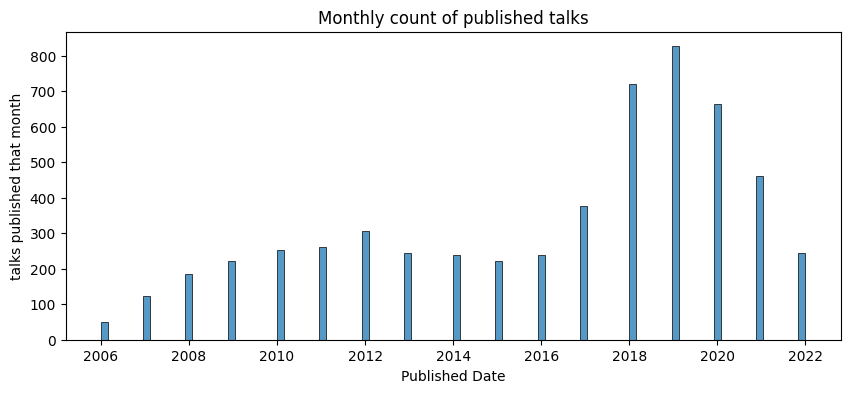

In [ ]:
plt.figure(figsize=(10,4))
data['published_date'] = pd.to_datetime(data['published_date'])
hist = sns.histplot(x=data['published_date'].dt.year, bins=100)
plt.title("Monthly count of published talks")
plt.xlabel("Published Date")
plt.ylabel("talks published that month")

The above plot shows that the maximum number of talks were published between the years 2018 and 2020

##<-----------------------.**Visualize the relationship between likes vs views using scatter plot.**
----------------------------->

In [ ]:
def clean_likes_column(number):
    if number[-1] == 'K':
        number = float(number[:-1]) * 1000
        if number >= 100000:
            # to get a bit of randomness in data
            number += np.random.randint(1, 1000)
        else:
            number += np.random.randint(1, 100)
    elif number[-1] == 'M':
        number = float(number[:-1]) * 1000000 + np.random.randint(1000, 10000)

    return int(number)

In [ ]:
likes_series = data['likes'].apply(clean_likes_column)

In [ ]:
likes_series.max()

2208645

In [ ]:
data['views'].max()

73389142

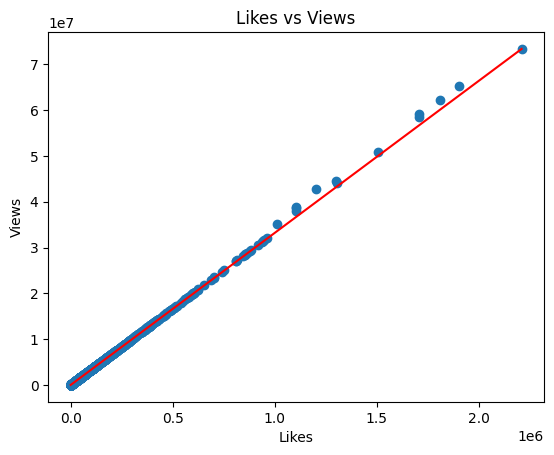

In [ ]:
plt.scatter(likes_series, data['views'])
plt.title("Likes vs Views")
plt.xlabel("Likes")
plt.ylabel("Views")
plt.plot([0,2208645], [0, 73389142], color='red')

The above graph shows that the number of likes increases almost linearly with the increase in the number of views.

# **TASK 2** - Classification/Regression

Perform following steps on the same dataset which you used for EDA.
> - Data Preprocessing (as per requirement)
> - Feature Engineering
> - Split dataset in train-test (80:20 ratio)
> - Model selection
> - Model training
> - Model evaluation
> - Fine-tune the Model
> - Make predictions

Summarize your model's performance by evaluation metrices



In [ ]:
data

,_id,duration,event,likes,page_url,published_date,recorded_date,related_videos,speakers,subtitle_languages,summary,title,topics,transcript,views,youtube_video_code
0,21,992,TED2006,17K,https://www.ted.com/talks/mena_trott_meet_the_...,2006-08-25 00:11:00+00:00,2006-02-23,"[""144"",""1282"",""1379"",""87"",""2302"",""2638""]","[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"[{""id"":""4"",""name"":""culture""},{""id"":""13"",""name""...","Over the past couple of days, as I've been pre...",589115,RlBTxuWCuL8
1,1,957,TED2006,110K,https://www.ted.com/talks/al_gore_averting_the...,2006-06-27 00:11:00+00:00,2006-02-25,"[""243"",""547"",""2093"",""74405"",""64693"",""83767""]","[{""name"":""Al Gore"",""occupation"":""Climate advoc...","[{""name"":""Greek"",""code"":""el""},{""name"":""Gujarat...",With the same humor and humanity he exuded in ...,Averting the climate crisis,"[{""id"":""3"",""name"":""climate change""},{""id"":""4"",...","Thank you so much, Chris. And it's truly a gre...",3671801,rDiGYuQicpA
2,7,1266,TED2006,60K,https://www.ted.com/talks/david_pogue_simplici...,2006-06-27 00:11:00+00:00,2006-02-24,"[""1725"",""2274"",""172"",""2664"",""2464"",""1268""]","[{""name"":""David Pogue"",""occupation"":""Technolog...","[{""name"":""Greek"",""code"":""el""},{""name"":""English...",New York Times columnist David Pogue takes aim...,Simplicity sells,"[{""id"":""10"",""name"":""technology""},{""id"":""36"",""n...","(Music: ""The Sound of Silence,"" Simon &amp; Ga...",2008487,NEjZt0y6OOw
3,47,1126,TEDGlobal 2005,80K,https://www.ted.com/talks/david_deutsch_chemic...,2006-09-12 00:11:00+00:00,2005-07-14,"[""2237"",""701"",""1095"",""1386"",""76211"",""242""]","[{""name"":""David Deutsch"",""occupation"":""Physici...","[{""name"":""Greek"",""code"":""el""},{""name"":""English...",Legendary scientist David Deutsch puts theoret...,Chemical scum that dream of distant quasars,"[{""id"":""3"",""name"":""climate change""},{""id"":""4"",...",We've been told to go out on a limb and say so...,2694257,gQliI_WGaGk
4,55,1524,TED2006,14K,https://www.ted.com/talks/jehane_noujaim_my_wi...,2006-07-25 00:11:00+00:00,2006-02-26,"[""2228"",""1476"",""800"",""2890"",""45233"",""2694""]","[{""name"":""Jehane Noujaim"",""occupation"":""Filmma...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...",Jehane Noujaim unveils her 2006 TED Prize wish...,My wish: A global day of film,"[{""id"":""4"",""name"":""culture""},{""id"":""6"",""name"":...",I can't help but this wish: to think about whe...,489757,QCFSrb6B5nw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,95714,278,TED-Ed,5.8K,https://www.ted.com/talks/lyla_latif_the_true_...,2022-07-21 15:04:36+00:00,2022-07-21,"[""79294"",""24262"",""84056""]","[{""name"":""Lyla Latif"",""occupation"":""Educator""}]","[{""name"":""English"",""code"":""en""},{""name"":""Arabi...","In 2020, Mali produced over 71 tons of gold— a...",The true cost of gold,"[{""id"":""18"",""name"":""business""},{""id"":""19"",""nam...",Gold is one of Earth’s most valuable resources...,195168,1nglN3mfZUw
5627,95710,940,TEDxSeattle,10K,https://www.ted.com/talks/trish_millines_dziko...,2022-07-21 15:13:53+00:00,2021-11-20,"[""83539"",""46386"",""52190"",""1667"",""1710"",""2050""]","[{""name"":""Trish Millines Dziko"",""occupation"":""...","[{""name"":""English"",""code"":""en""},{""name"":""Arabi...","Forget home economics and standardized tests, ...",How schools can nurture every student's genius,"[{""id"":""52"",""name"":""education""},{""id"":""53"",""na...",Let me tell you about the fifth-grade students...,356620,Other
5628,95451,1048,TED2022,12K,https://www.ted.com/talks/david_wengrow_a_new_...,2022-07-22 14:36:05+00:00,2022-04-10,"[""72994"",""73025"",""91371"",""563"",""68"",""1226""]","[{""name"":""David Wengrow"",""occupation"":""Archae

In [ ]:
X = likes_series

In [ ]:
X.shape

(5631, 1)

In [ ]:
X[0]

array([17090])

In [ ]:
Y = data['views']

In [ ]:
Y.shape

(5631,)

In [ ]:
#import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((4504, 1), (4504,))

In [ ]:
X_test.shape, Y_test.shape

((1127, 1), (1127,))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# creating a model
model = LinearRegression()

In [ ]:
# train a model using training data
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
model.coef_

array([33.69885353])

In [ ]:
model.intercept_

-8743.21121389931

In [ ]:
model.coef_.round(2)

array([33.7])

In [ ]:
model.score(X_train, Y_train)

0.9996392338081874

In [ ]:
model.score(X_test, Y_test)

0.9995649143708369

 # ***By analyzing the above result, we conclude that the prediction of the number of views by the number of likes has a very less difference in their scores.***